In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
notebook_path = r"/content/drive/MyDrive/Colab Notebooks"


In [ ]:
import os
os.chdir(notebook_path)
!pwd
print(os.getcwd())

/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


In [ ]:
dataset = pd.read_csv('/content/df_reduced_normalized.csv')

In [ ]:
print(type(dataset))
print(dataset.shape)

dataset.describe()

<class 'pandas.core.frame.DataFrame'>
(20000, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.500000,0.542700,0.500350,0.975800,0.500370,0.45125,0.047000,0.125700,0.756100,0.631700,...,0.957250,0.063850,2.574350,0.100250,0.102757,0.156700,0.484350,8.678150,4.990000,6.000700
std,0.500013,0.498186,0.500012,0.153673,0.172894,0.49763,0.211644,0.331519,0.429444,0.482355,...,0.202298,0.244492,0.957245,0.246185,0.222097,0.363527,0.499768,2.869351,1.009629,2.032463
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.375000,0.00000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,5.000000
50%,0.500000,1.000000,1.000000,1.000000,0.468750,0.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,1.000000,0.593750,1.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.133333,0.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### **EDA**

In [ ]:
summary = dataset.describe()
print("Summary Statistics:")
print(summary)

Summary Statistics:
       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     20000.000000  20000.000000  20000.000000  20000.000000   
mean          0.500000      0.542700      0.500350      0.975800   
std           0.500013      0.498186      0.500012      0.153673   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI       Smoker        Stroke  HeartDiseaseorAttack  \
count  20000.000000  20000.00000  20000.000000          20000.000000   
mean       0.500370      0.45125      0.047000              0.125700   
std        0.172894      0.49763      0.211644              0.331519   
min        0.000000      0.00000      0.000000              0.000000   
25%    

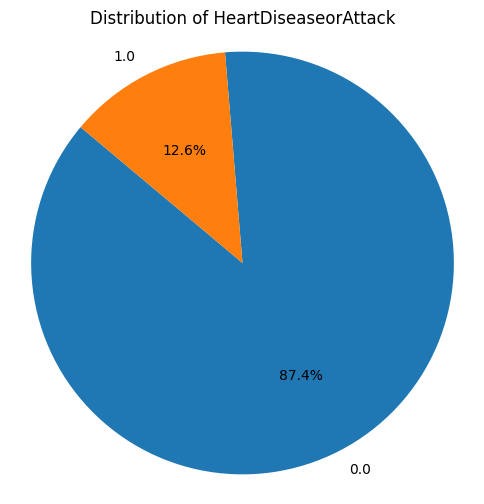

In [ ]:
# Select the variable to plot
variable_to_plot = 'HeartDiseaseorAttack'

# Count the occurrences of each category in the variable
counts = dataset[variable_to_plot].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of {}'.format(variable_to_plot))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

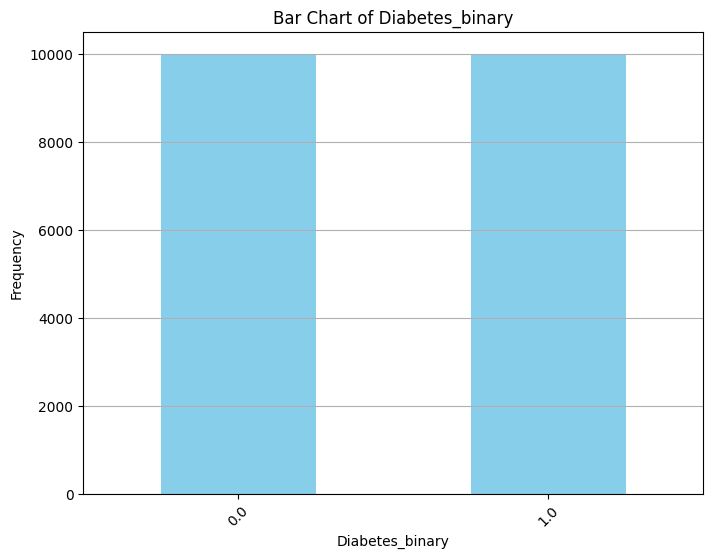

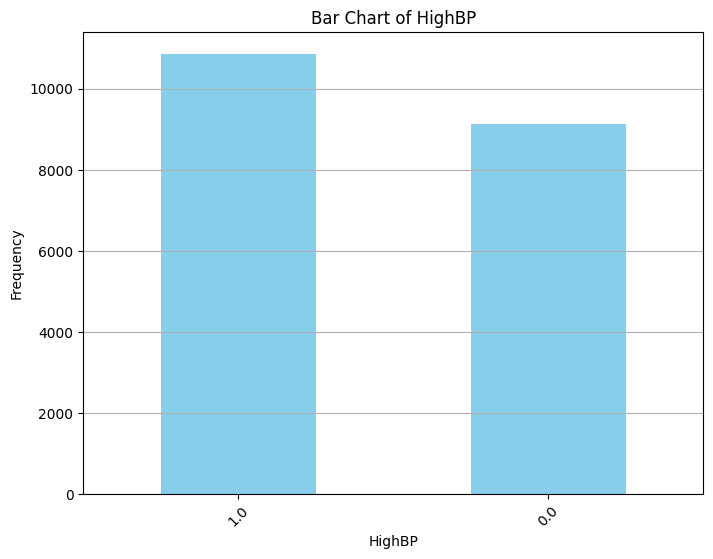

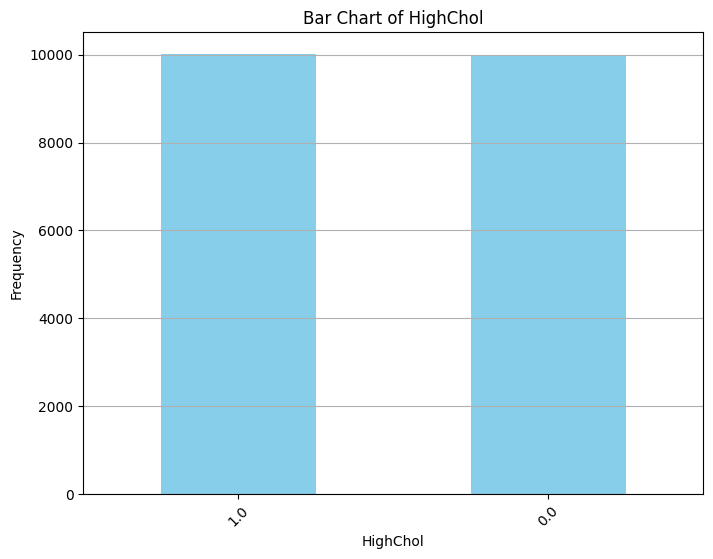

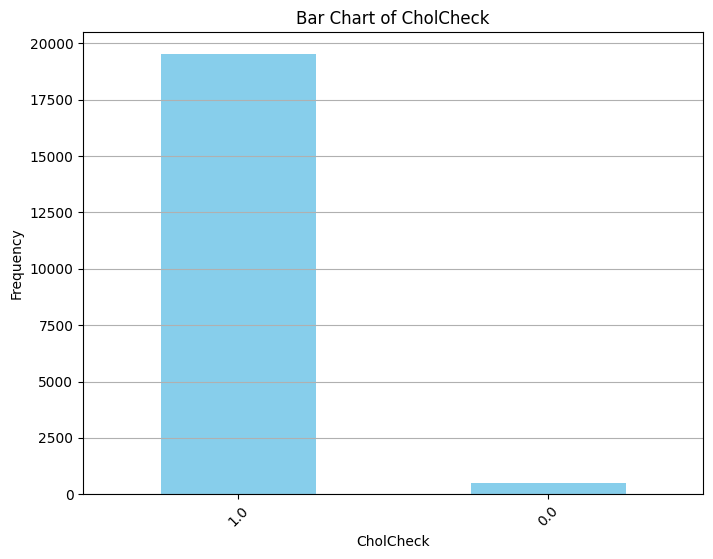

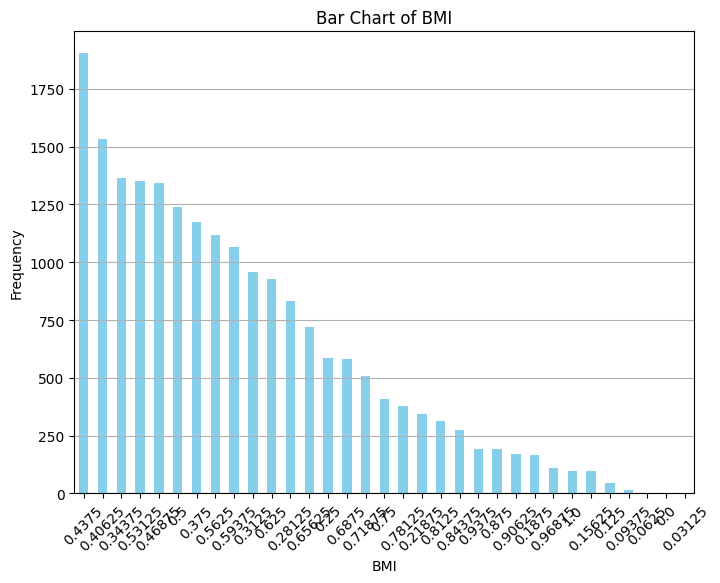

In [ ]:
# Selecting the first few variables
variables = dataset.columns[:5]

# Creating bar charts for the selected variables
for var in variables:
    plt.figure(figsize=(8, 6))
    dataset[var].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

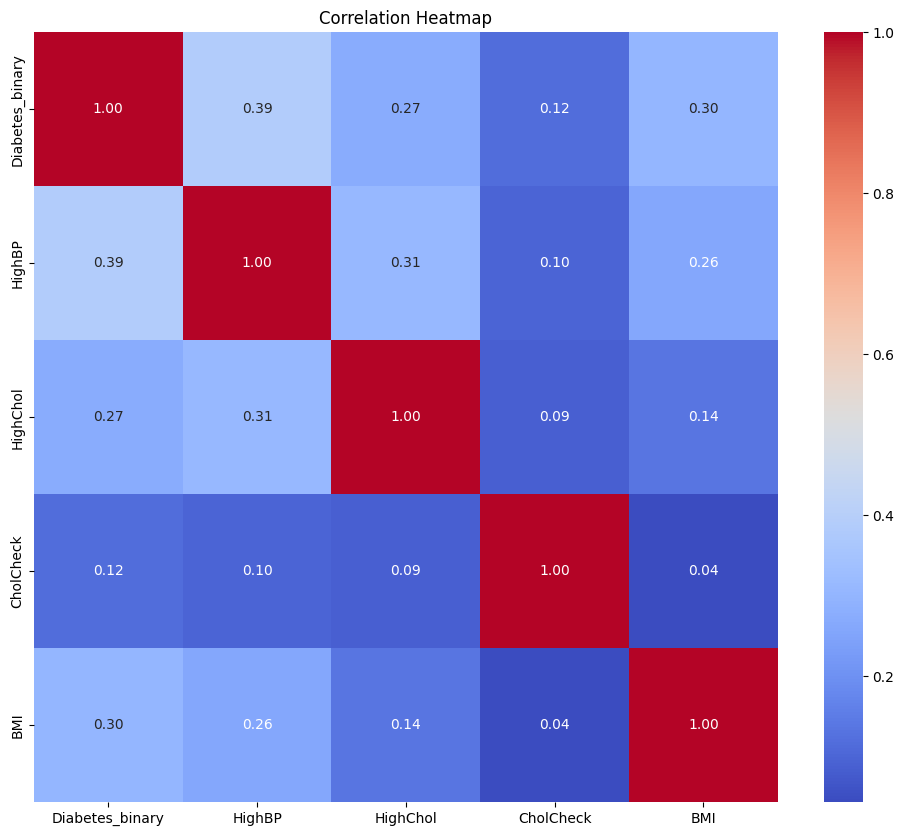

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.iloc[:, :5].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
scaler = StandardScaler()
features_to_scale = dataset.columns.drop('Diabetes_binary')
dataset[features_to_scale] = scaler.fit_transform(dataset[features_to_scale])

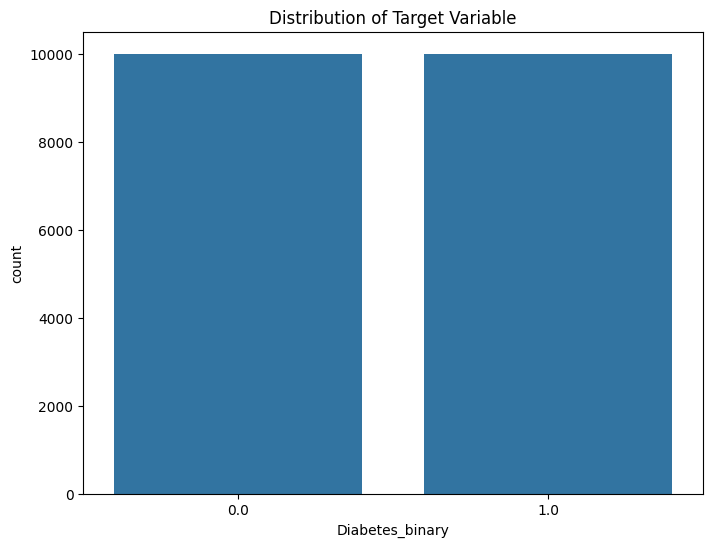

In [ ]:
# Distribution of Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_binary', data=dataset)
plt.title("Distribution of Target Variable")
plt.show()

In [ ]:
# Feature Importance
from sklearn.ensemble import RandomForestClassifier

X = dataset.drop('Diabetes_binary', axis=1)
y = dataset['Diabetes_binary']

rf = RandomForestClassifier()
rf.fit(X, y)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', figsize=(10,6))
plt.title('Top 10 Important Features')
plt.xlabel('Relative Importance')
plt.show()

#  **K** **-** **Nearest** **Neighbours**

## Justification


In this project, we are using the K-Nearest Neighbors (KNN) as on of the algorithm for diabetic prediction. The choice of KNN is justified by the following reasons:

1. KNN is a non-parametric, lazy learning algorithm. It means that KNN does not make any assumptions about the underlying data. This makes it suitable for a wide range of applications, including diabetic prediction.

2. KNN is a versatile algorithm that can be used for both classification and regression. In this project, we are using KNN for classification, as we are trying to predict whether a patient has diabetes or not.

3. KNN is a good choice for high-dimensional data. PCA is used to reduce the dimensionality of the data before applying KNN. This helps in reducing the computational complexity of the KNN algorithm.

4. KNN is a robust algorithm. It is less prone to overfitting, which is a common problem in machine learning. This makes KNN a good choice for diabetic prediction, as we want a model that generalizes well to unseen data.

5. KNN is a good choice for multi-class problems. In this project, we are trying to predict whether a patient has diabetes or not. This is a multi-class problem, as there are three classes: no diabetes, pre-diabetes, and diabetes. KNN can handle multi-class problems effectively.



In [ ]:
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 16), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)

X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Getting the indices of the selected features
selected_indices = selector.get_support(indices=True)
# Getting the names of the selected features
selected_features = X.columns[selected_indices]
print("Selected features:", selected_features)

Selected features: Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'AnyHealthcare'],
      dtype='object')


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_classifier.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.70325

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70      2019
         1.0       0.69      0.73      0.71      1981

    accuracy                           0.70      4000
   macro avg       0.70      0.70      0.70      4000
weighted avg       0.70      0.70      0.70      4000



In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_n_neighbors = grid_search.best_params_['n_neighbors']
print("Best n_neighbors:", best_n_neighbors)

Best n_neighbors: 15


In [ ]:
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
# Make predictions on the testing set
y_pred_best = best_knn_classifier.predict(X_test_scaled)

In [ ]:
# Evaluate the performance of the classifier with the best parameter
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with best parameter:", accuracy_best)

Accuracy with best parameter: 0.72675




1. **Selected Features**:
    - The selected features used for classification are 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', and 'AnyHealthcare'.

2. **Accuracy**:
    - The overall accuracy of the KNN classifier on the test set is approximately 70.33%.

3. **Classification Report**:
    - Precision, recall, and F1-score are metrics used to evaluate the performance of a classification model.
    - Precision is the ratio of correctly predicted positive observations to the total predicted positives.
    - Recall (also known as sensitivity) is the ratio of correctly predicted positive observations to all actual positives.
    - F1-score is the weighted average of precision and recall.
    - The classification report shows the precision, recall, and F1-score for both classes (0 and 1), along with support (the number of actual occurrences of the class in the test set).

4. **Best Number of Neighbors**:
    - The best number of neighbors obtained through grid search is 15.

5. **Accuracy with Best Parameter**:
    - After using the best parameter obtained from grid search, the accuracy of the KNN classifier on the test set improves to approximately 72.68%.

The model performs reasonably well, with accuracy slightly improving when using the best parameter for the number of neighbors. The classification report indicates that the model has balanced performance across both classes, with similar precision, recall, and F1-score for each class.

# **Neural Network**

### Justification

1. **Complex Patterns and Non-Linearity:**
    - The dataset contains diverse and complex patterns that may not be effectively captured by linear models. Neural networks excel in capturing non-linear relationships and intricate patterns within the data.

2. **Feature Heterogeneity:**
    - Neural networks can effectively handle datasets with diverse types of features, such as numerical, categorical, and ordinal. This flexibility is crucial when dealing with a dataset like ours, which includes various health-related and demographic features.

3. **Automatic Feature Learning:**
    - Neural networks are capable of automatically learning relevant hierarchical features from the input data. This is especially advantageous in situations where manual feature engineering might be challenging due to the complexity of the relationships between different variables.

4. **Representation Learning:**
    - The ability of neural networks to learn hierarchical representations can enhance the model's ability to extract meaningful features from raw data. This can be crucial in identifying intricate relationships between health-related factors and diabetes outcomes.

5. **Adaptability to Data Variability:**
    - Neural networks are known for their adaptability to varying data distributions. In healthcare datasets, where individual health conditions and characteristics can vary widely, a model that adapts well to data variability is essential for robust predictions.

6. **Handling Class Imbalance:**
    - Neural networks can be designed to handle class imbalance effectively. In our dataset, where the distribution of diabetes classes may be imbalanced, a model that is sensitive to class representation can improve the accuracy of predictions.

7. **Predictive Accuracy:**
    - Neural networks have demonstrated state-of-the-art performance in various machine learning tasks, including complex medical predictions. The aim is to leverage their ability to capture intricate patterns and achieve high predictive accuracy in identifying diabetes outcomes.

8. **Continuous Model Improvement:**
    - Neural networks allow for continuous improvement through fine-tuning and optimization. This is crucial in healthcare applications where the model may need periodic updates to adapt to evolving patient populations and health trends.

In conclusion, the choice of a neural network for diabetes prediction is driven by its capability to handle the complexity and diversity of the dataset, automatically learn relevant features, and adapt to varying data conditions. The goal is to harness the power of neural networks to provide accurate and meaningful predictions, ultimately contributing to improved understanding and management of diabetes.


In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/DiabetesHI.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

# Define features (X) and target variable (y)
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Convert the target variable to categorical
y_categorical = pd.get_dummies(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate class weights for handling imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

# Build the neural network model for multi-class classification
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Three classes, so 'softmax' activation

# Compile the model with class weights
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, class_weight=dict(enumerate(class_weights)))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


**Test Loss:** 0.8341
**Test Accuracy:** ~60%

Note: There will be minor variations to the accuracy whenever the code is executed.

# Confusion Matrix
We examine the confusion matrix to understand how well the model is performaing for each class.

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(np.array(y_test), axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)


The confusion matrix provides a detailed breakdown of the model's performance across different classes. In our case, with a multi-class classification problem, the confusion matrix has three rows and three columns, corresponding to the three classes.

Interpretation:

| Actual / Predicted | Class 0 | Class 1 | Class 2 |
|---------------------|---------|---------|---------|
| Class 0             | 25324   | 8246    | 9225    |
| Class 1             | 242     | 263     | 439     |
| Class 2             | 927     | 1654    | 4416    |



*   **Class 0 (No diabetes or only during pregnancy)**:


>     Correctly predicted as Class 0: 25324
    Incorrectly predicted as Class 1: 8246
    Incorrectly predicted as Class 2: 9225


*   **Class 1 (Prediabetes):**


>     Incorrectly predicted as Class 0: 242
    Correctly predicted as Class 1: 263
    Incorrectly predicted as Class 2: 439
    

*   **Class 2 (Diabetes):**


>     Incorrectly predicted as Class 0: 927
    Incorrectly predicted as Class 1: 1654
    Correctly predicted as Class 2: 4416

# **Data Visualisation**
Now we take a look at some data visualizations, the following visualisations were done:


*   Visualize the correlation matrix of numerical features
*   Visualize the distribution of numerical features
*   Visualize the relationship between numerical features and the target variable






In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the dataset
df.head()


# Visualize the correlation matrix of numerical features
plt.figure(figsize=(14, 10))

# Compute the correlation matrix
corr_matrix = df.corr()

# Choose a diverging color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot the heatmap with adjusted settings
sns.heatmap(corr_matrix, annot=True, cmap=cmap, linewidths=0.5, fmt=".2f", annot_kws={"size": 8}, cbar_kws={"shrink": 0.8})

# Adjust axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, ha='right', fontsize=10)

plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.show()

# Visualize the distribution of numerical features with improved spacing (for better visual clarity)
num_features = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=len(num_features)//2, ncols=2, figsize=(16, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.histplot(df[feature], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

    # Adjust x-axis label rotation
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



### **Correlation Interpretations**

1. **Genhlth and Phys hlth (0.52):**
   - There is a moderate positive correlation (0.52) between "Genhlth" (General Health) and "Phys hlth" (Physical Health). This suggests that individuals who report better general health also tend to report better physical health.

2. **Genhlth and Diffwalk (0.46):**
   - There is a moderate positive correlation (0.46) between "Genhlth" and "Diffwalk" (Difficulty Walking). This indicates that individuals with better general health may also experience less difficulty walking.

3. **Physhlth and Diffwalk (0.48):**
   - There is a moderate positive correlation (0.48) between "Physhlth" (Physical Health) and "Diffwalk." This suggests that individuals with better physical health may experience less difficulty walking.

4. **Income and Genhlth (-0.37):**
   - There is a moderate negative correlation (-0.37) between "Income" and "Genhlth." This implies that, on average, individuals with higher incomes tend to report better general health.

5. **Genhlth and PhysActivity (-0.27):**
   - There is a negative correlation (-0.27) between "Genhlth" and "PhysActivity" (Physical Activity). This suggests that individuals who report better general health may have a slightly lower level of reported physical activity.

6. **Menthhlth and Education (-0.28):**
   - There is a negative correlation (-0.28) between "Menthhlth" (Mental Health) and "Education." This implies that, on average, individuals with higher levels of education may report slightly better mental health.

7. **Diabetes_012 and HighBP (0.27):**
   -  A positive correlation of 0.27 suggests a weak positive linear relationship between "Diabetes_012" and "HighBP." This implies that as the values of "Diabetes_012" increase, there is a tendency for the values of "HighBP" to also increase.
  
8. **Diabetes_012 and HighChol (0.21):**
   - A positive correlation of 0.21 suggests a weak positive linear relationship between "Diabetes_012" and "HighChol" (High Cholesterol). This implies that as the values of "Diabetes_012" increase, there is a tendency for the values of "HighChol" to also increase.

9. **HighBP and HighChol (0.30):**
   - A positive correlation of 0.30 suggests a weak positive linear relationship between "HighBP" and "HighChol." This implies that as the values of "HighBP" increase, there is a tendency for the values of "HighChol" to also increase.

10. **Age and Diabetes_012 (0.19):**
    - A positive correlation of 0.19 suggests a weak positive linear relationship between "Age" and "Diabetes_012." This implies that as the values of "Age" increase, there is a tendency for the values of "Diabetes_012" to also increase.


# **Linear Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import statsmodels.api as sm
import plotly.graph_objects as go

In [ ]:
data = pd.read_csv("/content/df_reduced_normalized.csv")

In [ ]:
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,1.0,1.0,0.56250,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,5.0,8.0
1,0.0,0.0,0.0,1.0,0.50000,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,7.0
2,0.0,1.0,1.0,1.0,0.34375,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,6.0
3,0.0,0.0,0.0,1.0,0.37500,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.4,0.0,0.0,1.0,2.0,6.0,7.0
4,0.0,0.0,0.0,1.0,0.43750,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,13.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.0,1.0,1.0,1.0,0.84375,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,2.0,0.0,0.0,1.0,0.0,10.0,3.0,4.0
19996,1.0,0.0,0.0,1.0,0.34375,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
19997,1.0,1.0,0.0,1.0,0.78125,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,13.0,2.0,4.0
19998,1.0,1.0,1.0,1.0,0.43750,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,10.0,4.0,6.0


In [ ]:
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary'].values.reshape((-1,1))

In [ ]:
print(X.shape)
print(y.shape)

(20000, 21)
(20000, 1)


In [ ]:
X = sm.add_constant(X)
print(X)

       const  HighBP  HighChol  CholCheck      BMI  Smoker  Stroke  \
0        1.0     0.0       1.0        1.0  0.56250     1.0     0.0   
1        1.0     0.0       0.0        1.0  0.50000     0.0     0.0   
2        1.0     1.0       1.0        1.0  0.34375     1.0     1.0   
3        1.0     0.0       0.0        1.0  0.37500     1.0     0.0   
4        1.0     0.0       0.0        1.0  0.43750     1.0     0.0   
...      ...     ...       ...        ...      ...     ...     ...   
19995    1.0     1.0       1.0        1.0  0.84375     1.0     0.0   
19996    1.0     0.0       0.0        1.0  0.34375     0.0     0.0   
19997    1.0     1.0       0.0        1.0  0.78125     1.0     0.0   
19998    1.0     1.0       1.0        1.0  0.43750     1.0     0.0   
19999    1.0     1.0       1.0        1.0  0.87500     1.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                       0.0           1.0     1.0  ...            1.0   
1            

In [ ]:
model = sm.OLS(y, X)   # OLS = Ordinary Least Squares, NOTE, X is 2nd argument

results = model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     433.3
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:13:12   Log-Likelihood:                -10763.
No. Observations:               20000   AIC:                         2.157e+04
Df Residuals:                   19978   BIC:                         2.174e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5050 

In [ ]:
print(f"coefficient of determination: {results.rsquared}")
print(f"adjusted coefficient of determination: {results.rsquared_adj}")
print(f"regression coefficients: {results.params}")

coefficient of determination: 0.31292345861872295
adjusted coefficient of determination: 0.31220123380297526
regression coefficients: const                  -0.505021
HighBP                  0.165571
HighChol                0.088652
CholCheck               0.180288
BMI                     0.500407
Smoker                 -0.004014
Stroke                  0.030508
HeartDiseaseorAttack    0.051265
PhysActivity            0.002681
Fruits                 -0.012551
Veggies                -0.005976
HvyAlcoholConsump      -0.121292
AnyHealthcare           0.004815
NoDocbcCost             0.010568
GenHlth                 0.118001
MentHlth               -0.032809
PhysHlth               -0.037163
DiffWalk                0.019295
Sex                     0.046239
Age                     0.027101
Education              -0.008371
Income                 -0.011107
dtype: float64


In [ ]:
print(f"predicted response:\n{results.fittedvalues}")
print(f"predicted response:\n{results.predict(X)}")

predicted response:
0        0.443346
1        0.342720
2        0.246688
3        0.173768
4        0.386865
           ...   
19995    0.801309
19996    0.449716
19997    0.878489
19998    0.755757
19999    1.072745
Length: 20000, dtype: float64
predicted response:
0        0.443346
1        0.342720
2        0.246688
3        0.173768
4        0.386865
           ...   
19995    0.801309
19996    0.449716
19997    0.878489
19998    0.755757
19999    1.072745
Length: 20000, dtype: float64


**Conclusion**

Using Advanced Linear Regression with statsmodel to fit predictors (independent variable) and y (dependent variable).

*   HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income: These are the coefficients for each respective independent variable.
*   R-squared is 0.313, which means that approximately 31.3% of the variability in the dependent variable is explained by the independent variables in the model.

*   the Adjusted R-squared is slightly lower than R-squared, at 0.312.

Based on the output provided includes the predicted responses generated by a regression model, which estimates the values of the dependent variable (y) based on the independent variables (X). Each predicted response represents the model's estimation of the dependent variable for each observation in the dataset. These predictions are derived from the coefficients obtained through the regression analysis, reflecting how well the model fits the observed data and allowing for comparison with the actual values of the dependent variable to assess the model's accuracy and performance.





# **LOGICAL REGRESSION**

In [ ]:
# Separate features and target variable
X = dataset.drop('Diabetes_binary', axis=1)
y = dataset['Diabetes_binary']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = logistic_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.744
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.71      0.74      2019
         1.0       0.73      0.77      0.75      1981

    accuracy                           0.74      4000
   macro avg       0.74      0.74      0.74      4000
weighted avg       0.75      0.74      0.74      4000

Confusion Matrix:
 [[1443  576]
 [ 448 1533]]


# *Conclusion For Logistic Regression*

1.   **Model Accuracy**
*   The logistic regression model achieved an accuracy of 0.744, indicating that it correctly predicted the diabetes status for 74.4% of the samples in the test dataset.

2.   **Model Performance**
*  The classification report provides a detailed overview of the model's performance for each class ('Without Diabetes' and 'With Diabetes'), including precision, recall, and F1-score. These metrics measure the model's ability to correctly identify positive and negative cases of diabetes.
*   Precision: The proportion of true positive predictions among all positive predictions.
*   Recall: The proportion of true positive predictions among all actual positive cases.
*   F1-score: The harmonic mean of precision and recall, providing a balanced measure of the model's performance.

3.  **Interpretation**
*   Based on the model's performance metrics and visualizations, it appears that the logistic regression model is reasonably effective in predicting diabetes status based on the provided features.
*   However, further analysis and refinement may be needed to improve the model's accuracy and robustness, such as feature engineering, parameter tuning, or exploring alternative algorithms.

4.   **Recommendations**
*   Consider exploring additional feature engineering techniques to enhance the predictive power of the model.
*   Experiment with different machine learning algorithms and hyperparameters to find the optimal model configuration.EX:Random Forests,Gradient Boosting,etc.
*   Collecting more data or incorporating domain knowledge may also improve the model's performance and generalizability.












